# 演習問題1

In [1]:
from collections import defaultdict
import itertools
import numpy as np
import pandas as pd

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

## 全探索で解く

In [2]:
ans = defaultdict(int)

for x,y in itertools.product(range(1,7), repeat=2):
  z = x + y
  ans[z] += 1

ans

defaultdict(int,
            {2: 1,
             3: 2,
             4: 3,
             5: 4,
             6: 5,
             7: 6,
             8: 5,
             9: 4,
             10: 3,
             11: 2,
             12: 1})

In [3]:
print('z', 'ans')
for z in range(2,13):
  print(z, ans[z])

z ans
2 1
3 2
4 3
5 4
6 5
7 6
8 5
9 4
10 3
11 2
12 1


## numpyで解く


In [4]:
# https://note.nkmk.me/python-numpy-arange-linspace/
x = np.arange(1,7)
y = np.arange(1,7)

# https://python.atelierkobato.com/meshgrid/
X,Y = np.meshgrid(x, y)
Z = X + Y

Z

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [5]:
# https://note.nkmk.me/python-numpy-unique/

z, counts = np.unique(Z, return_counts=True)
print(z)
print(counts)

[ 2  3  4  5  6  7  8  9 10 11 12]
[1 2 3 4 5 6 5 4 3 2 1]


## シミュレーション

In [17]:
X = np.random.randint(1,7,1000000)
Y = np.random.randint(1,7,1000000)
Z = X + Y

In [20]:
Z_df = pd.DataFrame({"num":Z})
Z_df

,num
0,3
1,6
2,7
3,9
4,8
...,...
999995,10
999996,11
999997,8
999998,4


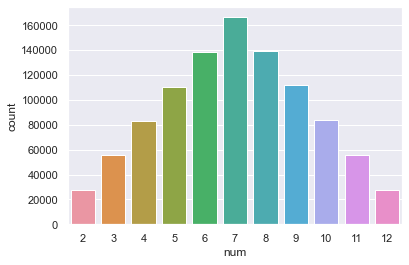

In [25]:
sns.countplot(x="num", hue=None, data=Z_df)
